# Explicit orthogonal regression

Estimate the parameters of a scalar non-linear model from experimental data.

$$ y = f(x, \bm{\beta}) =  \frac{\beta_1 x^2 + x (1-x)}{\beta_1 x^2 + 2 x (1-x) + \beta_2 (1-x)^2} $$

In [1]:
import Pkg
Pkg.activate("..")
using Odrpack

using Plots

  Activating project at `/home/Odrpack`


First, we define the experimental data and the model function. 

In [2]:
xdata = [0.100, 0.300, 0.400, 0.500, 0.600, 0.700, 0.800]
ydata = [0.059, 0.243, 0.364, 0.486, 0.583, 0.721, 0.824]

7-element Vector{Float64}:
 0.059
 0.243
 0.364
 0.486
 0.583
 0.721
 0.824

In [3]:
function f!(x::Vector{Float64}, beta::Vector{Float64}, y::Vector{Float64})
    b1, b2 = beta
    y .= (b1 .* x.^2 .+ x .* (1 .- x)) ./ (b1 .* x.^2 .+ 2 .* x .* (1 .- x) .+ b2 .* (1 .- x).^2)
    return nothing
end

f! (generic function with 1 method)

Then, we define an initial guess for the model parameters `beta` and, optionally, also the corresponding bounds.

In [4]:
beta0 = [1.0, 1.0]
bounds = ([0.0, 0.0], [2.0, 2.0])

([0.0, 0.0], [2.0, 2.0])

Lastly, we define the weights for `x` and `y` based on a suitable rationale, such as the estimated uncertainty of each variable.

In [5]:
sigma_x = 0.01
sigma_y = 0.05

weight_x = 1/sigma_x^2
weight_y = 1/sigma_y^2

399.99999999999994

We can now launch the regression! If you want to see a brief computation report, set `report='short'`.

In [6]:
sol = odr_fit(f!, xdata, ydata, beta0, bounds=bounds, weight_x=weight_x, weight_y=weight_y);

The result is packed in a `OdrResult` struct. Let's check the solution convergence and the estimated model parameters.

In [7]:
sol.stopreason

"Sum of squares convergence."

In [8]:
sol.beta

2-element Vector{Float64}:
 1.4291868010096827
 1.674734334237366

All fine! Let's plot the solution.

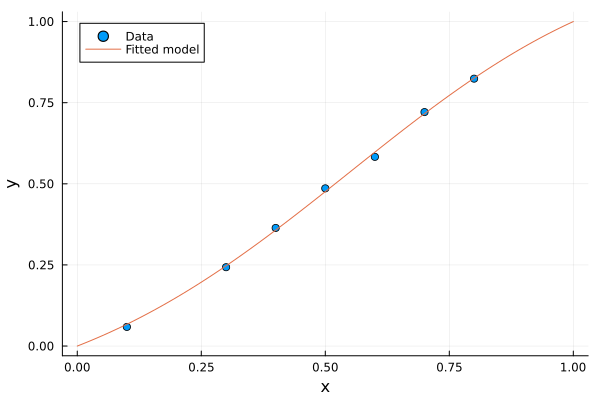

In [9]:
# Scatter data
scatter(xdata, ydata, label="Data", legend=:topleft)

# Plot fitted model
xm = collect(range(0.0, 1.0; length=100))
ym = zeros(length(xm))
f!(xm, sol.beta, ym)
plot!(xm, ym, label="Fitted model")

xlabel!("x")
ylabel!("y")